# Satellite Images: Sentinel-2

We're going to be using a Sentinal-2 image because they're publicly available and amazing quality.

In [1]:
import rasterio     # import the main rasterio function
from glob import glob
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib   # matplotlib is the primary python plotting and viz library
import numpy as np
# this bit of magic allows matplotlib to plot inline in a jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

# We can check which version we're running by printing the "__version__" variable
print("rasterio's version is: " + rasterio.__version__)
print(rasterio)

rasterio's version is: 1.3.6
<module 'rasterio' from '/Users/pruthvishyambilla/opt/anaconda3/lib/python3.9/site-packages/rasterio/__init__.py'>


## Open a image

In [31]:
# filepath to our image
img_fp = '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff'

# Open a geospatial dataset
dataset = rasterio.open(img_fp)
print(dataset)

<open DatasetReader name='/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff' mode='r'>


## Image attributes

In [32]:
# what is the name of this image
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))


# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))

# Does the raster have metadata?
metadata = dataset.meta
print('All raster metadata:')
print(metadata, '\n')

Image filename: /Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff

Number of bands in image: 2

Image size is: 954 rows x 298 columns

Raster driver: GTiff

Image projection:
EPSG:4326 

Image geo-transform:
| 0.00, 0.00, 89.08|
| 0.00,-0.00, 22.29|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 298, 'height': 954, 'count': 2, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00017972600540053956, 0.0, 89.07989501953126,
       0.0, -0.00016649141203214603, 22.292966106968972)} 



## Image raster bands

In [33]:
s_sentinel_bands = glob("/Users/pruthvishyambilla/Downloads/*B?*.tiff")

s_sentinel_bands.sort()
s_sentinel_bands

['/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/Users/pruthvishyambilla/Downloads/2020-01-27-00_00_2020-01-27-23_59_Se

In [35]:
# open these files and add all bands to an array
arrs = []
for band in s_sentinel_bands:
    with rasterio.open(band) as f:
        arrs.append(f.read(1))

# convert the list to a numpy array
sentinel_img = np.array(arrs, dtype=arrs[0].dtype)
sentinel_img.shape

(12, 954, 298)

### Plot all the bands in the image

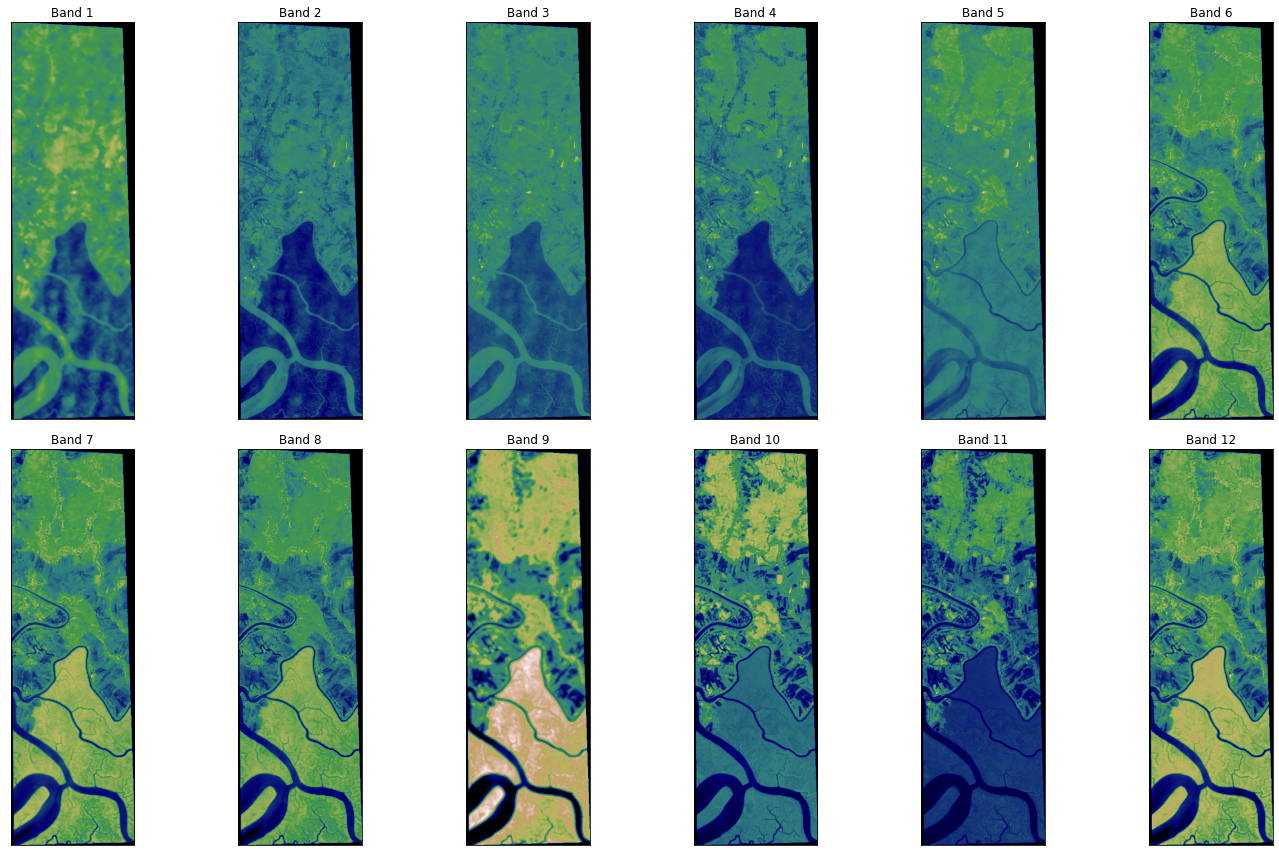

In [36]:
ep.plot_bands(sentinel_img, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

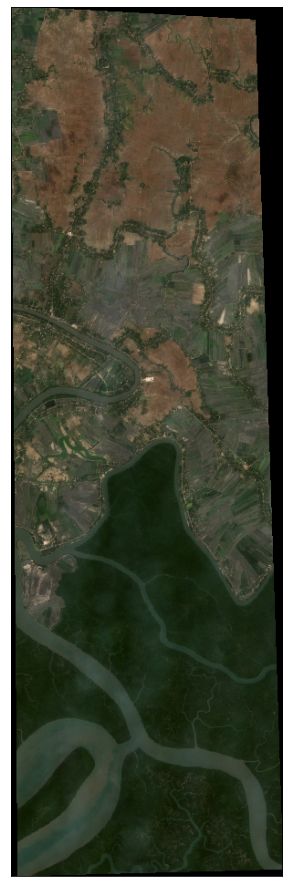

In [42]:
# RGB Composite Image

rgb = ep.plot_rgb(sentinel_img, 
                  rgb=(3,2,1), 
                  figsize=(10, 16))
plt.show()

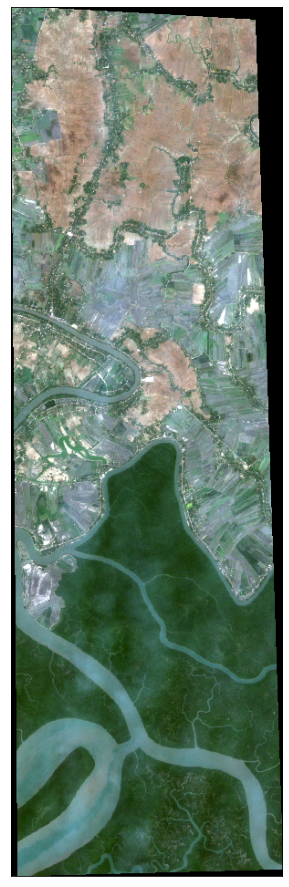

In [43]:
# RGB Composite Image with Strech

ep.plot_rgb(sentinel_img,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

### Now let's plot histograms of pixel values to check what is going on with the different bands:

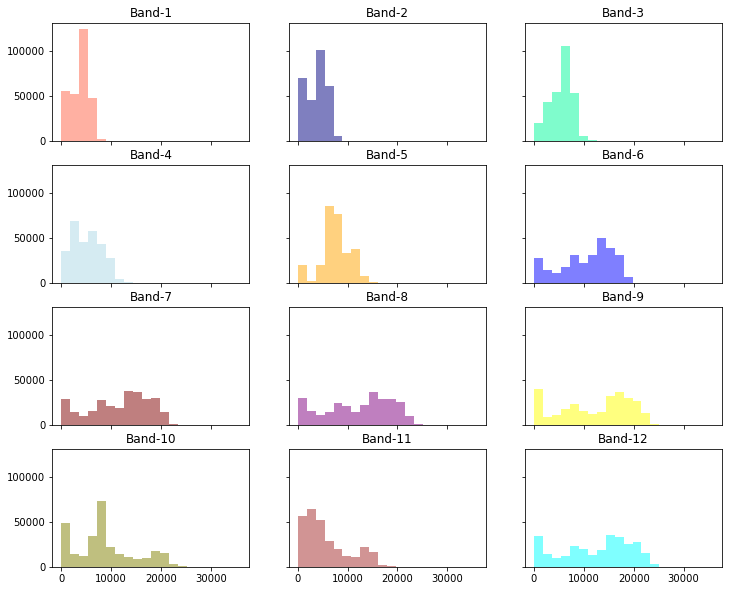

In [44]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(sentinel_img, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()

### Normalized Difference Vegetation Index (NDVI)

In [40]:
# just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

bandNIR = sentinel_img[7] # eighth band
bandRed = sentinel_img[3] # fourth band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

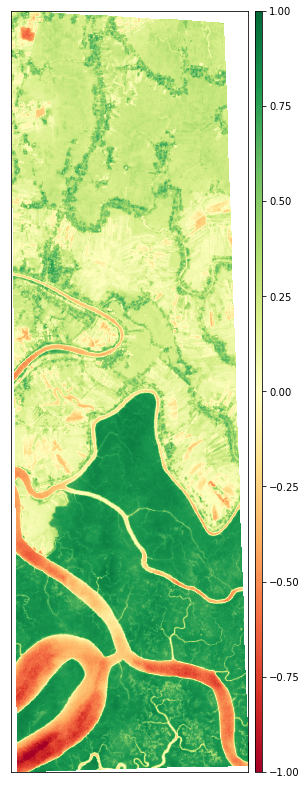

Max NDVI: 0.9313410501298358
Mean NDVI: 0.325387759858054
Min NDVI: -0.9968261165268647


In [41]:
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()


# Let's check out some stats on our NDVI
stat = np.ma.masked_array(ndvi, np.isnan(ndvi))
print('Max NDVI: {m}'.format(m=stat.max()))
print('Mean NDVI: {m}'.format(m=stat.mean()))
print('Min NDVI: {m}'.format(m=stat.min()))


- Near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).

- Bright green indicates high NDVI. Whereas red has low NDVI

- Red and orange pixels represent areas with no vegetation. Yellow pixels represent areas with low to moderate vegetation. Green pixels represent areas with high vegetation density and vigor.